**IMPORT LIBRARIES**

*Importing required libraries for the EDA*

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import missingno as msno

import warnings
warnings.filterwarnings('ignore')



/kaggle/input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv


**LOADING DATASET**

*Loading the dataset into the dataframe*

In [2]:
#create bestseller dataframe
bestseller=pd.read_csv("../input/amazon-top-50-bestselling-books-2009-2019/bestsellers with categories.csv")

**DATA SPECIES EXPLORATION**

*Checking the types of data*

In [3]:
bestseller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


As per the above data, we can conclude that the data contains 1 float, 3 integers and one object value. All the colums indicate that they are non-null, meaning they have no missing value.

*Display 10 random samples from the dataframe*

In [4]:
bestseller.sample(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre
485,The Whole30: The 30-Day Guide to Total Health ...,Melissa Hartwig Urban,4.6,7508,16,2017,Non Fiction
394,The Great Gatsby,F. Scott Fitzgerald,4.4,11616,7,2012,Fiction
270,Proof of Heaven: A Neurosurgeon's Journey into...,Eben Alexander,4.3,13616,10,2013,Non Fiction
305,StrengthsFinder 2.0,Gallup,4.0,5069,17,2010,Non Fiction
388,The Girl with the Dragon Tattoo (Millennium Se...,Stieg Larsson,4.4,10559,2,2009,Fiction
120,Game of Thrones Boxed Set: A Game of Thrones/A...,George R.R. Martin,4.6,5594,5,2013,Fiction
163,Hillbilly Elegy: A Memoir of a Family and Cult...,J. D. Vance,4.4,15526,14,2016,Non Fiction
521,Unfreedom of the Press,Mark R. Levin,4.9,5956,11,2019,Non Fiction
282,Quiet: The Power of Introverts in a World That...,Susan Cain,4.6,10009,20,2012,Non Fiction
434,The Maze Runner (Book 1),James Dashner,4.5,10101,8,2014,Fiction


*Return shape of the dataframe*

In [5]:
bestseller.shape

(550, 7)

*Show stats of the dataframe*

In [6]:
bestseller.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


*Find null/missing values*

In [7]:
bestseller.isnull().any() 

Name           False
Author         False
User Rating    False
Reviews        False
Price          False
Year           False
Genre          False
dtype: bool

*Visualize missing values as a bar chart*

<AxesSubplot:>

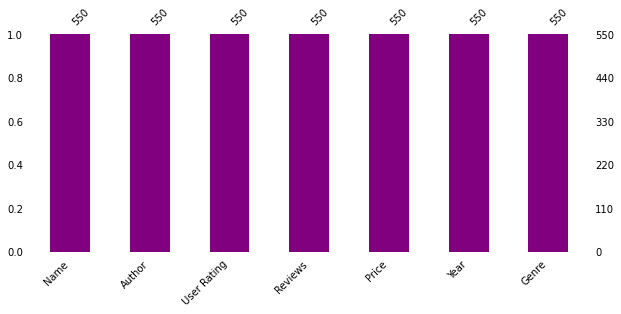

In [8]:
msno.bar(bestseller, figsize=(10,4), color = "purple",fontsize=10) 

As per the bar chart you are able to see how many missing values are there in each feature. In the case of our dataframe, there are no missing values.


*Return number of values in Genre column*

In [9]:
bestseller['Genre'].value_counts()

Non Fiction    310
Fiction        240
Name: Genre, dtype: int64

*Checking and dropping the duplicate rows*

Returning a boolean series to check for duplicates

In [10]:

# sorting by name 
bestseller.sort_values("Name", inplace = True) 
# making a bool series 
bestseller_bool = bestseller["Name"].duplicated() 
  
# displaying data 
bestseller.head() 
  
# display data 
bestseller[bestseller_bool]


,Name,Author,User Rating,Reviews,Price,Year,Genre
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction
36,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
...,...,...,...,...,...,...,...
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction


As shown in the output image above, since the default parameter that was set was the 'Name', hence whenever the name is occured, the first book name that appears is considered Unique and rest are Duplicated. 

In the above case, you can see that the book Wonder by R. J. Palacio and You Are a Badass: How to Stop Doubting Your Gr... by Jen Sincero have several dupicate entries

Removing Duplicates

In [11]:
# making a bool series 
bestseller_bool = bestseller["Name"].duplicated(keep = False) 
  
# bool series 
bestseller_bool 
  
# passing NOT of bool series to see unique values only 
bestseller_books = bestseller[~bestseller_bool] 
  
# displaying data 
bestseller_books.info() 
bestseller_books 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 255 entries, 0 to 545
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         255 non-null    object 
 1   Author       255 non-null    object 
 2   User Rating  255 non-null    float64
 3   Reviews      255 non-null    int64  
 4   Price        255 non-null    int64  
 5   Year         255 non-null    int64  
 6   Genre        255 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 15.9+ KB


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
536,Whose Boat Is This Boat?: Comments That Don't ...,The Staff of The Late Show with,4.6,6669,12,2018,Non Fiction
537,Wild: From Lost to Found on the Pacific Crest ...,Cheryl Strayed,4.4,17044,18,2012,Non Fiction
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,15,2012,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,11,2010,Non Fiction


As per the output image above, since the duplicated() method returns False for Duplicates, the NOT of the boolean series is taken to only see the unique values in the new bestseller books dataframe.

**DATA VISUALIZATION**

In [12]:
 bestseller_books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


**1. The best selling books of the decade.**

In [13]:
decades_best = bestseller_books[bestseller_books['User Rating']==bestseller_books['User Rating'].max()]
genre_review = decades_best.pivot_table(index=['Genre'], values=['Reviews'], aggfunc={"min","max","sum","count","mean"})
genre_review

Reviews                                     
              count      max      mean     min       sum
Genre                                                   
Fiction        16.0  19622.0  7909.125  1884.0  126546.0
Non Fiction     5.0   7861.0  5137.600  2812.0   25688.0

* The output above show the list of books that recieve the highest user rating, which is 4.9

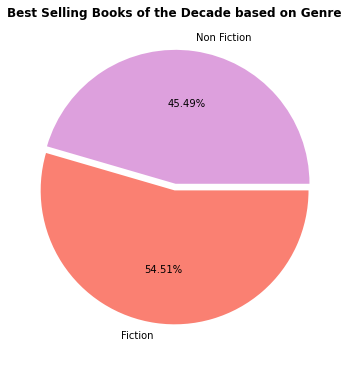

In [14]:
#Best Selling Books of the decade based on genre
plt.figure(figsize=(10,5))
plt.pie(bestseller_books['Genre'].value_counts().sort_values(),labels=bestseller_books['Genre'].value_counts().index,explode=[0.05,0],
        autopct='%1.2f%%',colors=['plum','salmon'])
plt.subplots_adjust(bottom=0, top=0.93, left=0.5, right=1)
plt.title("Best Selling Books of the Decade based on Genre",fontweight="bold", fontsize=12)
plt.show()

* About 55% of bestselling books in the decade are Fiction

**Box Plot**

* A box plot showing the reviews of the highest user rating 

<AxesSubplot:xlabel='User Rating', ylabel='Reviews'>

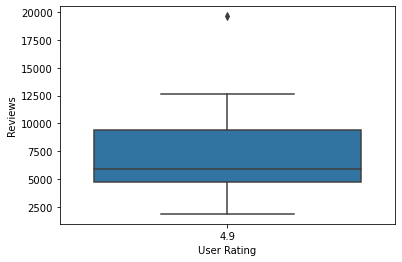

In [15]:
sns.boxplot( decades_best['User Rating'], decades_best['Reviews']) 

**2. The percentage of fiction to non-fiction.**

* First grouping based on "User Rating". Within each User Rating we are grouping based on "Genre" 


In [16]:
genre_rating = bestseller_books.groupby(['User Rating', 'Genre']) 
  
# Print the first book in each group 
genre_rating.first() 

Name  \
User Rating Genre                                                            
3.3         Fiction                                     The Casual Vacancy   
3.6         Fiction                             Go Set a Watchman: A Novel   
3.9         Fiction                                              Allegiant   
4.0         Fiction      Harry Potter and the Cursed Child, Parts 1 & 2...   
4.1         Fiction                                                Inferno   
            Non Fiction  Shred: The Revolutionary Diet: 6 Weeks 4 Inche...   
4.2         Fiction      Dead Reckoning (Sookie Stackhouse/True Blood, ...   
            Non Fiction                Autobiography of Mark Twain, Vol. 1   
4.3         Fiction                               And the Mountains Echoed   
            Non Fiction  Eat This, Not That! Thousands of Simple Food S...   
4.4         Fiction          A Dance with Dragons (A Song of Ice and Fire)   
            Non Fiction     Adult Coloring Book: Stress Relieving Patterns   
4.5         Fiction                       A Wrinkle in Time (Time Quintet)   
            Non Fiction  Adult Coloring Book Designs: Stress Relief Col...   
4.6         Fiction                                      11/22/63: A Novel   
            Non Fiction  A Patriot's History of the United States: From...   
4.7         Fiction                                 1984 (Signet Classics)   
            Non Fiction                      10-Day Green Smoothie Cleanse   
4.8         Fiction             Cabin Fever (Diary of a Wimpy Kid, Book 6)   
            Non Fiction  5,000 Awesome Facts (About Everything!) (Natio...   
4.9         Fiction      Dog Man and Cat Kid: From the Creator of Capta...   
            Non Fiction                           Hamilton: The Revolution   

                                              Author  Reviews  Price  Year  
User Rating Genre                                                           
3.3         Fiction                     J.K. Rowling     9372     12  2012  
3.6         Fiction                       Harper Lee    14982     19  2015  
3.9         Fiction                    Veronica Roth     6310     13  2013  
4.0         Fiction                     J.K. Rowling    23973     12  2016  
4.1         Fiction                        Dan Brown    29651     14  2013  
            Non Fiction            Ian K. Smith M.D.     2272      6  2013  
4.2         Fiction                 Charlaine Harris     2094      4  2011  
            Non Fiction                   Mark Twain      491     14  2010  
4.3         Fiction                  Khaled Hosseini    12159     13  2013  
            Non Fiction              David Zinczenko      956     14  2009  
4.4         Fiction              George R. R. Martin    12643     11  2011  
            Non Fiction           Blue Star Coloring     2951      6  2015  
4.5         Fiction                Madeleine L'Engle     5153      5  2018  
            Non Fiction  Adult Coloring Book Designs     2313      4  2016  
4.6         Fiction                     Stephen King     2052     22  2011  
            Non Fiction             Larry Schweikart      460      2  2010  
4.7         Fiction                    George Orwell    21424      6  2017  
            Non Fiction                     JJ Smith    17350      8  2016  
4.8         Fiction                      Jeff Kinney     4505      0  2011  
            Non Fiction     National Geographic Kids     7665     12  2019  
4.9         Fiction                       Dav Pilkey     5062      6  2018  
            Non Fiction           Lin-Manuel Miranda     5867     54  2016

* Distribution of different genre categories based on the user rating, reviews, price and year

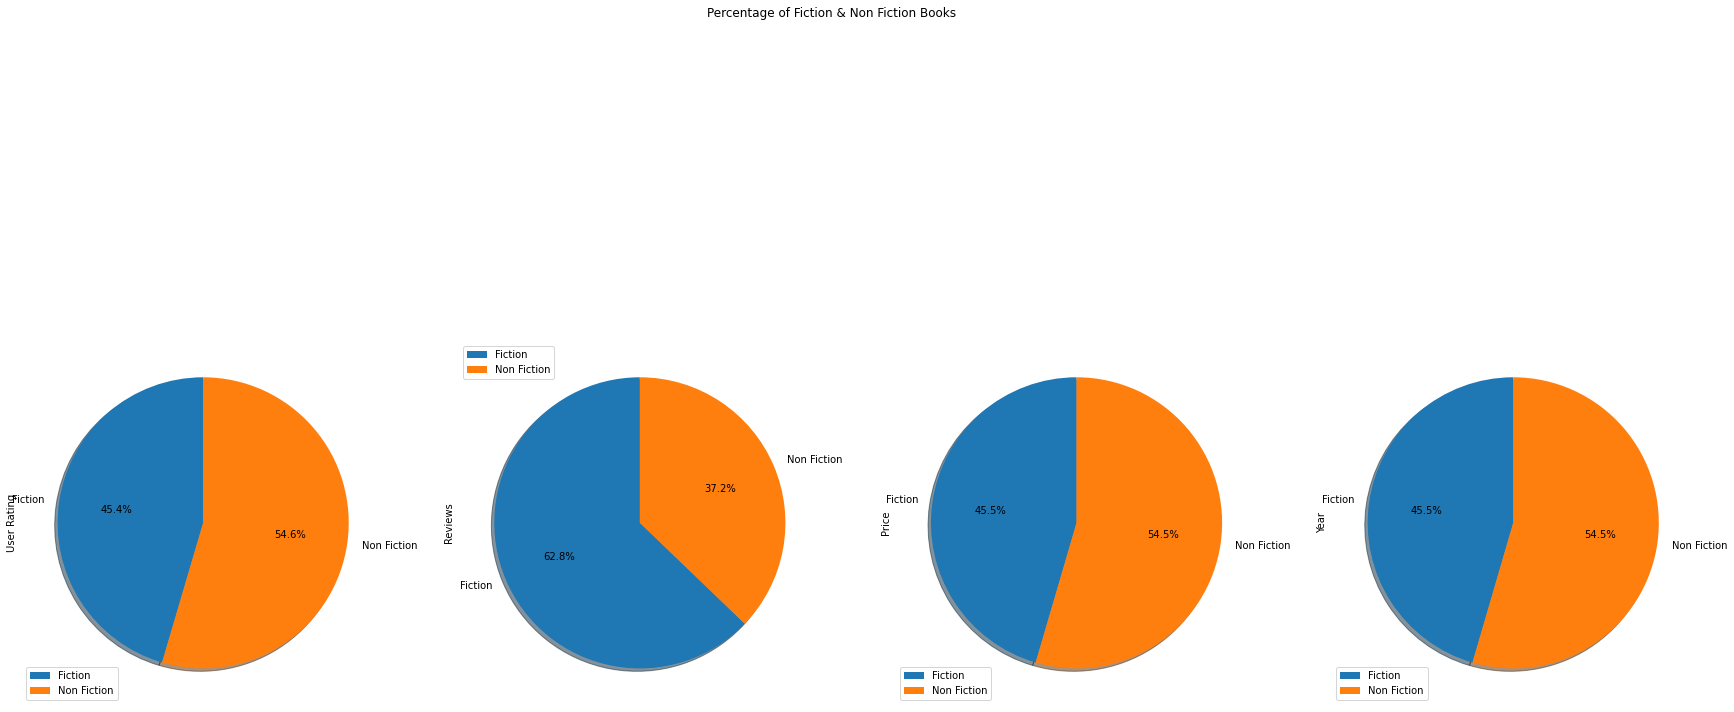

In [17]:
genre_grp = bestseller_books.groupby('Genre').sum().plot(kind='pie',title="Percentage of Fiction & Non Fiction Books",
                                        subplots=True, shadow = True,startangle=90,
figsize=(30,15), autopct='%1.1f%%')

* About 55% of bestselling books are Non Fiction based on the ratings, pricing and year
* About 63% of Fictions are thought to be bestselling books based on the readers reviews

* To get the total reviews per genre.

In [18]:
genre_review = bestseller_books.pivot_table(index=['Genre'], values=['Reviews'], aggfunc={"min","max","sum","count","mean"})
genre_review

Reviews                                         
              count      max          mean    min        sum
Genre                                                       
Fiction       116.0  87841.0  10109.275862  548.0  1172676.0
Non Fiction   139.0  18979.0   4994.964029   37.0   694300.0

* This allows you to sum the reviews (across all user ratings) per genre by using the aggfunc=’sum’ operation.

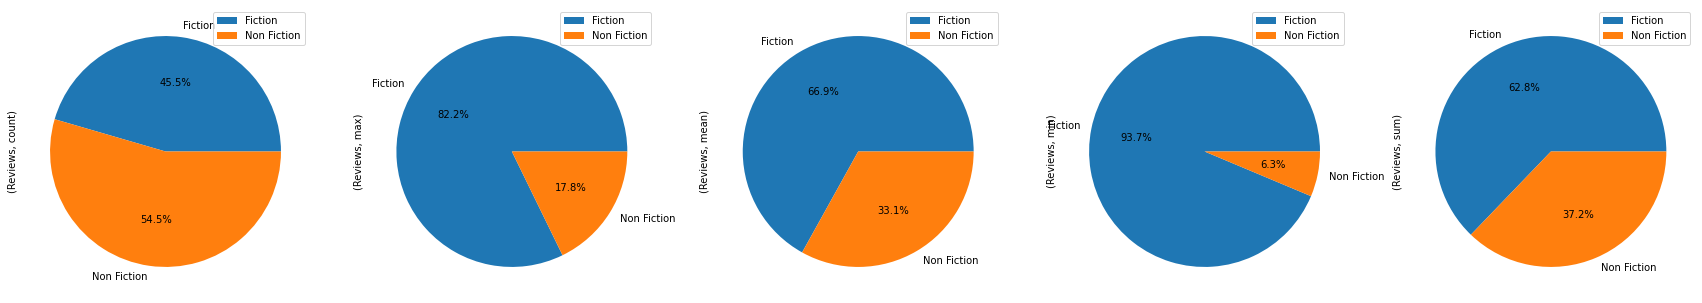

In [19]:
genre_review.plot.pie(subplots=True, figsize=(30, 20),autopct='%1.1f%%' );

* Distribution of Genre based on pricing

In [20]:
genre_price = bestseller_books.pivot_table(index=['Genre'], values=['Price'], aggfunc="sum")
genre_price

,Price
Genre,
Fiction,1540
Non Fiction,1847


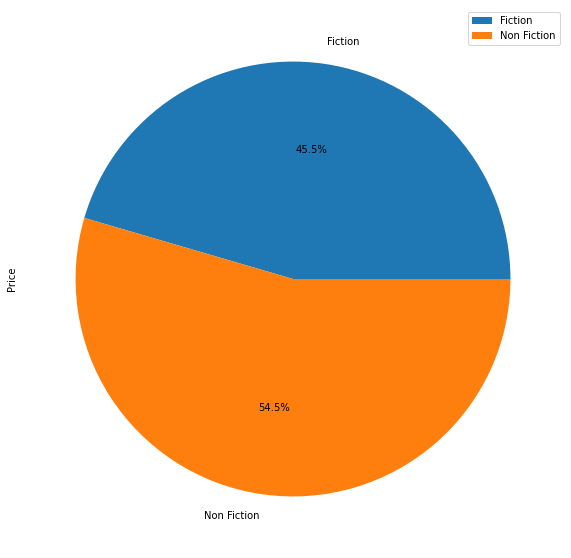

In [21]:
genre_price.plot.pie(subplots=True, figsize=(15, 10),autopct='%1.1f%%' );

* About 60% of bestselling books are Fiction, based on the book pricing over the years

**3. Trends over the years.**

**Violin Plot**

Text(0.5, 1.0, 'Book prices over the years')

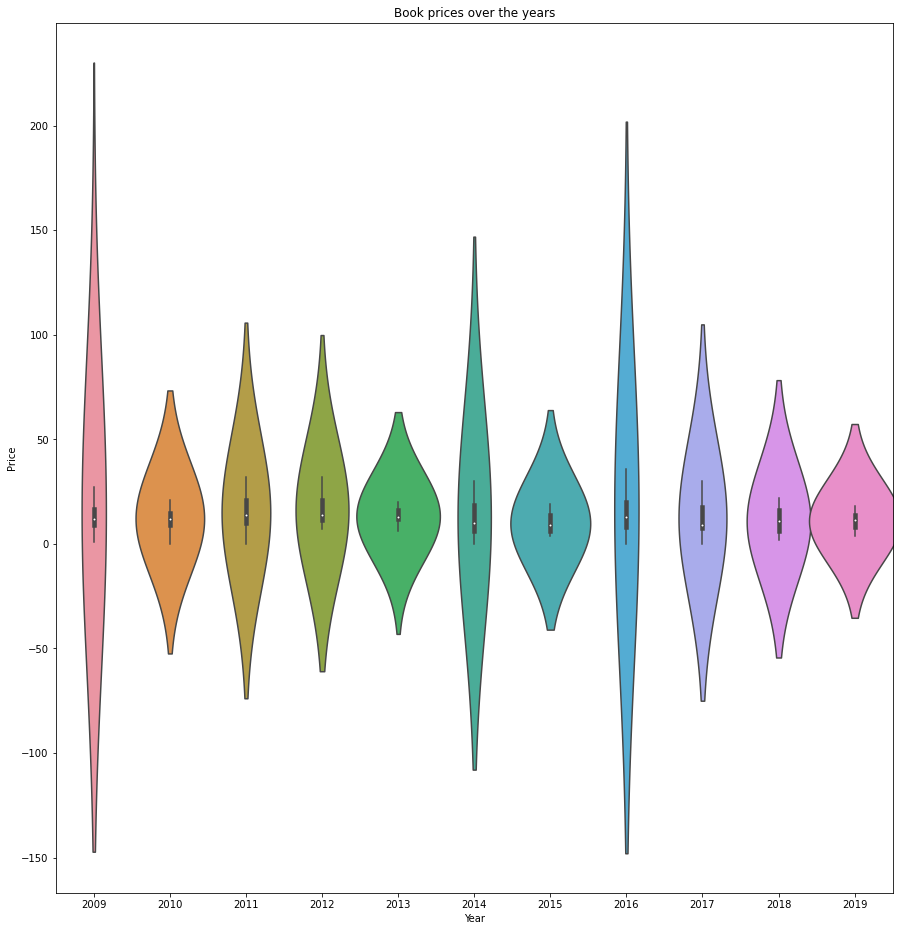

In [22]:
plt.figure(figsize=(15,16))

trend = sns.violinplot(data=bestseller_books,
                   x = 'Year',
                   y = 'Price', width=1.20, fliersize=30, bw=5)
trend.set_title("Book prices over the years")


* This violin plot shows the relationship of year to book pricing. The box plot elements show the median pricinf for book sold in 2015 was lower than for other years. The shape of the distribution; the extremely skinny on each end and wide in the middle, indicates that the price of books in year 2009 was higher

In [23]:
bestseller_books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


**Scatter Plot**

* Assigning columns to variables to ease using them when plotting


In [24]:
book = bestseller_books['Name']
author = bestseller_books['Author']
user_rating = bestseller_books['User Rating']
reviews = bestseller_books['Reviews']
price = bestseller_books['Price']
year = bestseller_books['Year']
genre = bestseller_books['Genre']

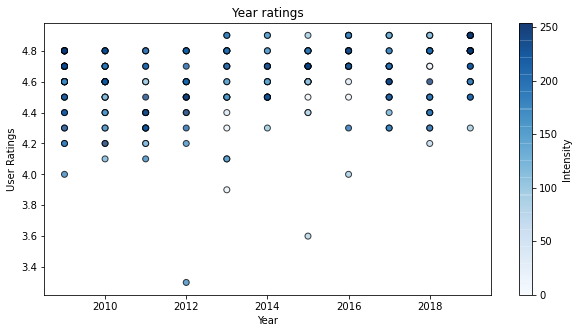

In [25]:
plt.figure(figsize = (10,5))
plt.title('Year ratings')

colours = np.arange(len(year))


plt.xlabel('Year')
plt.ylabel('User Ratings')

plt.scatter(year, user_rating, c = colours, cmap = 'Blues', marker = 'o', alpha = 0.75, edgecolor = 'k')

cbar = plt.colorbar()
cbar.set_label('Intensity')

plt.show()

* The scatter plots helps us understand how the User Ratings is changing based on the years.

**4. Top 10 Authors according to reviews**

* Find ranking of authors based on reviews

In [26]:
top_authors = bestseller_books.sort_values(by="Reviews", ascending=False).head(10) 
top_authors.pivot_table(index=['Author'], values=['Reviews'], aggfunc='sum') 

,Reviews
Author,
Alex Michaelides,27536
Andy Weir,39459
Celeste Ng,25706
Dan Brown,29651
Delia Owens,87841
E L James,25624
J.K. Rowling,23973
Margaret Atwood,29442
Paulo Coelho,35799


* Sorting reviews of top authors by descending order


In [27]:
top_authors.sort_values(by=['Reviews'], inplace=True, ascending=False)
top_authors

,Name,Author,User Rating,Reviews,Price,Year,Genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction
433,The Martian,Andy Weir,4.7,39459,9,2015,Fiction
338,The Alchemist,Paulo Coelho,4.7,35799,39,2014,Fiction
407,The Hunger Games,Suzanne Collins,4.7,32122,14,2010,Fiction
182,Inferno,Dan Brown,4.1,29651,14,2013,Fiction
399,The Handmaid's Tale,Margaret Atwood,4.3,29442,7,2017,Fiction
462,The Silent Patient,Alex Michaelides,4.5,27536,14,2019,Fiction
220,Little Fires Everywhere,Celeste Ng,4.5,25706,12,2018,Fiction
149,Grey: Fifty Shades of Grey as Told by Christia...,E L James,4.4,25624,14,2015,Fiction
154,"Harry Potter and the Cursed Child, Parts 1 & 2...",J.K. Rowling,4.0,23973,12,2016,Fiction


**Horizontal Bar**

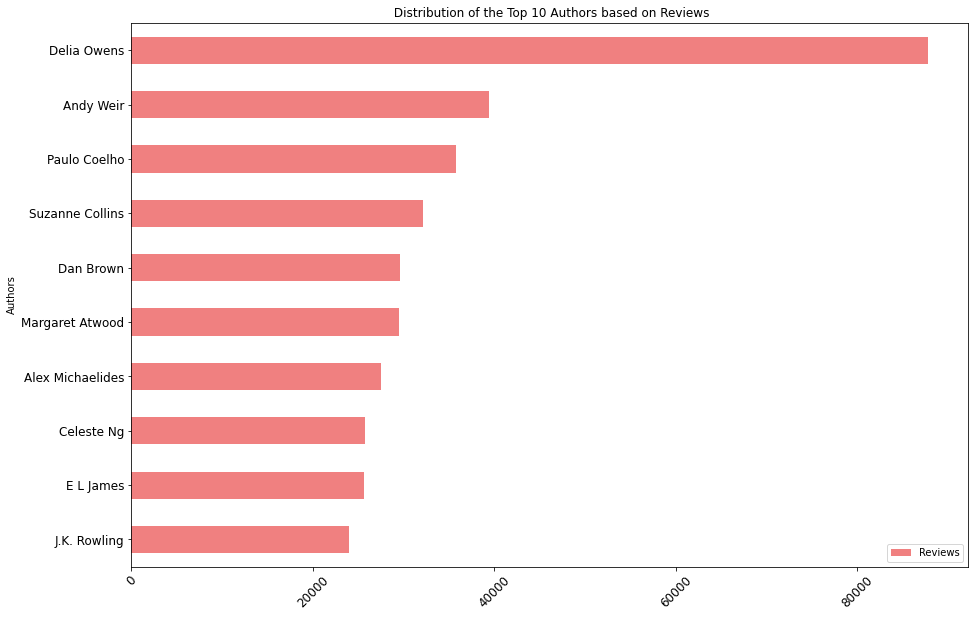

In [28]:
top_authors.plot.barh(x='Author', y='Reviews', rot=0,color='lightcoral',
                     figsize=(15,10), # Figsize to make the plot larger
title=' Distribution of the Top 10 Authors based on Reviews', # Adding a title to the top
xlabel="Authors", # Adding a label on the x axis
ylabel="Reviews", # Adding a label on y axis
fontsize='large').invert_yaxis() #invert horizontal bar chart

plt.xticks(rotation = 45);


* Based on the above bar plot,these are the 10 authors with most bestselling books based on the reviews

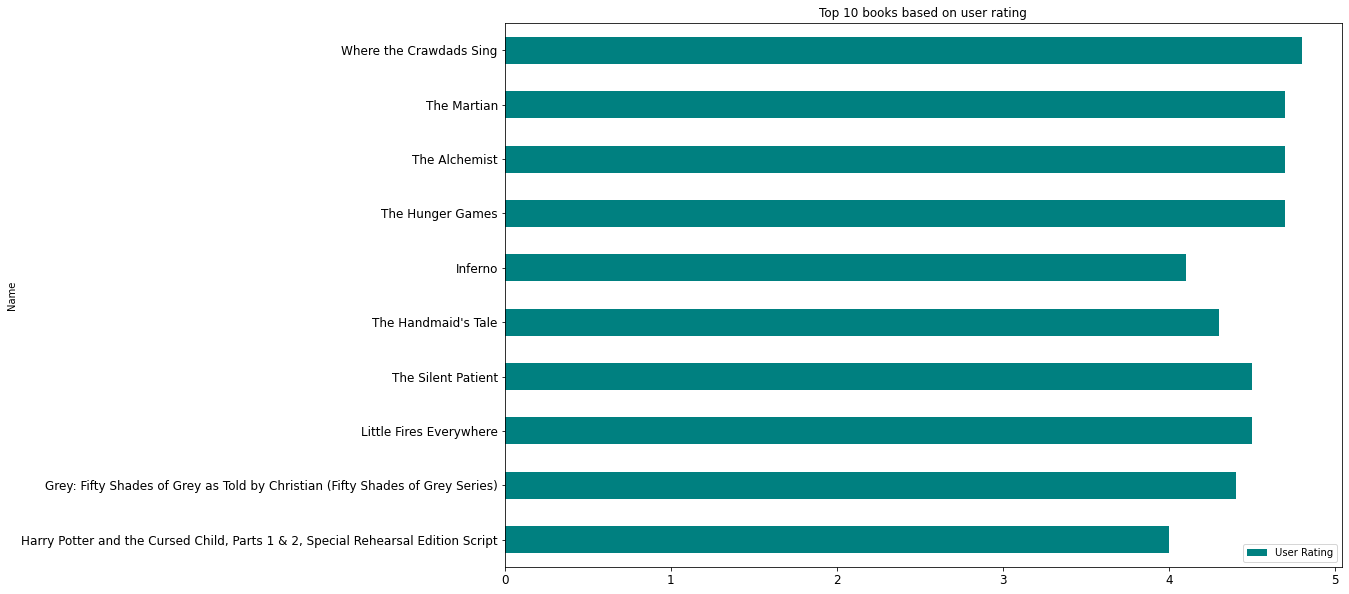

In [29]:
top_authors.plot.barh(x='Name', y='User Rating', rot=0,color='teal',
                     figsize=(15,10), # Figsize to make the plot larger
title='Top 10 books based on user rating', # Adding a title to the top
xlabel="Name", # Adding a label on the x axis
ylabel="User Rating", # Adding a label on y axis
fontsize='large').invert_yaxis() #invert horizontal bar chart

* These are the top 10 list of books, based on the ratings by the users